# Monte-Carlo Valuation (Single-Asset)
### Wilson Tobar

### Part a.

#### Import needed packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Function to estimate value of Euro call option value using Monte-Carlo simulation.

In [2]:
def monte_carlo_option_value(S0, K, r, T, sigma, n_steps, n_simulations, plot_bool=False):
    dt = T / n_steps

    # generate price paths.
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0

    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_simulations)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # calculate options payoffs.
    payoffs = np.maximum(S[:, -1] - K, 0)

    # discount payoffs to obtain option value.
    option_value = np.exp(-r * T) * np.mean(payoffs)

    # plot a few simulated paths
    if plot_bool:
        plt.figure(figsize=(6, 4))
        for i in range(10):
            plt.plot(S[i], lw=1)
        plt.title('Simulated Stock Price Paths')
        plt.xlabel('Time Step')
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()
    
    return option_value

#### Declare given variables.

In [3]:
S0 = 100
K = 100
r = 0.03
T = 1
sigma = 0.20
n_steps = 12
n_simulations = 10000

#### Use function to calculate call option value.

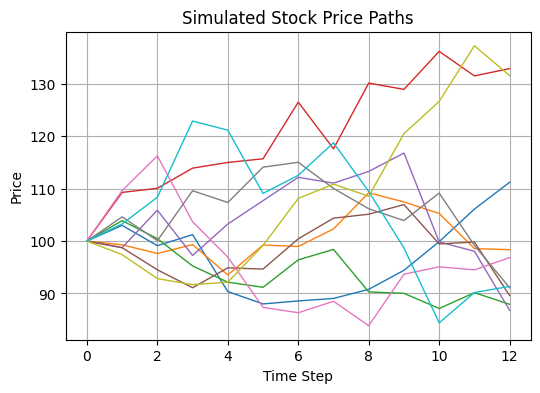

Estimated Call Option Value: 9.4897


In [4]:
np.random.seed(42)
option_value_100 = monte_carlo_option_value(S0, K, r, T, sigma, n_steps, n_simulations, True)
print(f"Estimated Call Option Value: {option_value_100:.4f}")

#### To calculate call option delta with stock price at 110, reset variable.

In [5]:
S0 = 110

#### Calculate the call option delta.

In [6]:
np.random.seed(42)
option_value_110 = monte_carlo_option_value(S0, K, r, T, sigma, n_steps, n_simulations, False)
print(f"Estimated Call Option Value with S = 110: {option_value_110:.4f}")
delta = (option_value_110 - option_value_100) / 10
print(f"Estimated Call Option Delta: {delta:.4f}")

Estimated Call Option Value with S = 110: 16.4055
Estimated Call Option Delta: 0.6916


#### To calculate call option rho with 3.3% risk free rate, reset variables.

In [7]:
S0 = 100

#### Calculate the call option rho.

In [8]:
np.random.seed(42)
option_value_r3 = monte_carlo_option_value(S0, K, r, T, sigma, n_steps, n_simulations, False)
np.random.seed(42)
option_value_r33 = monte_carlo_option_value(S0, K, r * 1.10, T, sigma, n_steps, n_simulations, False)

rho = (option_value_r33 - option_value_r3) / (0.0030)

print(f"Estimated Call Option Value with r = 3%: {option_value_r3:.4f}")
print(f"Estimated Call Option Value with r = 3.3%: {option_value_r33:.4f}")
print(f"Estimated Call Option Rho: {rho:.4f}")

Estimated Call Option Value with r = 3%: 9.4897
Estimated Call Option Value with r = 3.3%: 9.6425
Estimated Call Option Rho: 50.9309


#### To calculate call option vega with volatility at 22%, reset variables.

In [9]:
sigma = 0.22

#### Calculate call option vega.

In [10]:
np.random.seed(42)
option_value_sigma_22 = monte_carlo_option_value(S0, K, r, T, sigma, n_steps, n_simulations, False)
vega = (option_value_sigma_22 - option_value_100) / (0.020)

print(f"Estimated Call Option Value with sigma = 22%: {option_value_sigma_22:.4f}")
print(f"Estimated Call Option Vega: {vega:.4f}")

Estimated Call Option Value with sigma = 22%: 10.2719
Estimated Call Option Vega: 39.1082


### Part b.

#### Function to calculate Asian call option value with strike price at maturity is avg. of stock prices from months 1 to 12.

In [11]:
def monte_carlo_option_value_with_avgs(S0, K, r, T, sigma, n_steps, n_simulations, plot_bool=False):
    dt = T / n_steps
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0

    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_simulations)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    if plot_bool:
        plt.figure(figsize=(6, 4))
        for i in range(10):
            plt.plot(S[i], lw=1)
        plt.title('Simulated Stock Price Paths')
        plt.xlabel('Time Step')
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

    avg_stock_prices = np.mean(S[:, 1:], axis=1)

    payoffs = np.maximum(avg_stock_prices - K, 0)

    option_value = np.exp(-r * T) * np.mean(payoffs)

    return option_value


#### Declare variables.

In [12]:
S0 = 100
K = 100
r = 0.03
T = 1
sigma = 0.20
n_steps = 12
n_simulations = 10000

#### Use function to calculate option value.

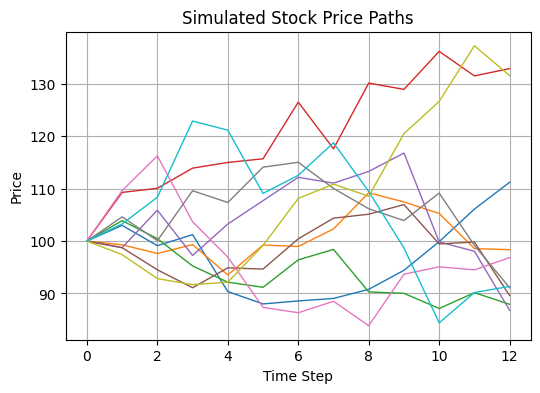

Estimated Call Option Value: 5.6746


In [13]:
np.random.seed(42)
option_value = monte_carlo_option_value_with_avgs(S0, K, r, T, sigma, n_steps, n_simulations, True)

print(f"Estimated Call Option Value: {option_value:.4f}")

#### Part c.

#### Function to estimate the value of a knock-out put option.

In [14]:
def monte_carlo_knockout_put(S0, K, r, T, sigma, upper_bound, lower_bound, n_steps, n_simulations, plot_bool=False):
    dt = T / n_steps
    S = np.zeros((n_simulations, n_steps + 1))
    S[:, 0] = S0

    for t in range(1, n_steps + 1):
        z = np.random.standard_normal(n_simulations)
        S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    if plot_bool:
        plt.figure(figsize=(6, 4))
        for i in range(10):
            plt.plot(S[i], lw=1)
        plt.title('Simulated Stock Price Paths')
        plt.xlabel('Time Step')
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

    knocked_out = np.any((S > upper_bound) | (S < lower_bound), axis=1)

    payoffs = np.maximum(K - S[:, -1], 0)
    payoffs[knocked_out] = 0

    non_zero_payoffs = payoffs[payoffs > 0]

    plt.figure(figsize=(6, 4))
    plt.hist(non_zero_payoffs, bins=50, color='mediumseagreen', edgecolor='black')
    plt.title('Histogram of Non-Zero Option Payoffs')
    plt.xlabel('Payoff')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    option_value = np.exp(-r * T) * np.mean(payoffs)
    
    return option_value

#### Declare variables used for this problem.

In [15]:
S0 = 100
K = 100
r = 0.03
T = 1
sigma = 0.20
upper_bound = 130
lower_bound = 80
n_steps = 250
n_simulations = 100000

#### Use option to calculate put option value.

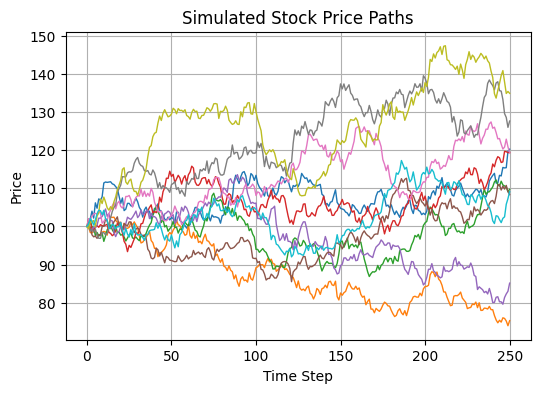

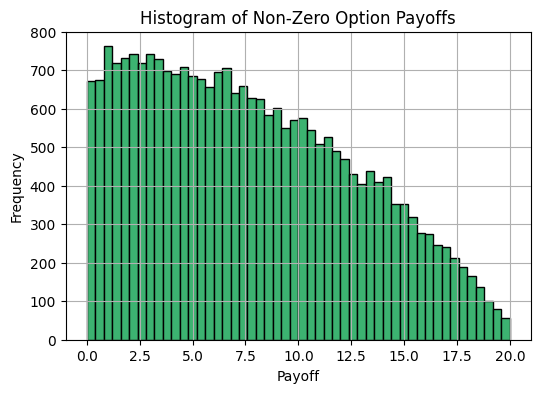

Estimated Knock-Out Put Option Value: 1.8781


In [16]:
np.random.seed(42)
option_value = monte_carlo_knockout_put(S0, K, r, T, sigma, upper_bound, lower_bound, n_steps, n_simulations, True)

print(f"Estimated Knock-Out Put Option Value: {option_value:.4f}")